In [2]:
from math import log

def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key]) / numEntries
        shannonEnt -= prob * log(prob,2)
    return shannonEnt

In [3]:
def createDataSet():
    dataSet = [[1, 1, 'yes'],
              [1, 1, 'yes'],
              [1, 0, 'no'],
              [0, 1, 'no'],
              [0, 1, 'no']]
    labels = ['no surfacing', 'flippers']
    return dataSet, labels

In [4]:
myDat, labels = createDataSet()

In [5]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [6]:
calcShannonEnt(myDat)

0.9709505944546686

In [7]:
myDat[0][-1] = 'maybe'

In [8]:
calcShannonEnt(myDat)

1.3709505944546687

In [9]:
def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [10]:
myDat, labels = createDataSet()

In [11]:
splitDataSet(myDat, 0, 1)

[[1, 'yes'], [1, 'yes'], [0, 'no']]

In [12]:
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0; bestFeature = -1
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet) / float(len(dataSet))
#             print('prbo:',prob)
            newEntropy = prob * calcShannonEnt(subDataSet) + newEntropy
#             print(newEntropy)
        infoGain = baseEntropy - newEntropy
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

In [13]:
myDat, labels = createDataSet()

In [14]:
chooseBestFeatureToSplit(myDat)

0

In [15]:
test1 = splitDataSet(myDat,1,1)
calcShannonEnt(test1)

1.0

In [16]:
#多数表决决定叶子节点的分类(数据集已经处理了所有属性,但类标签依然不唯一)
import operator

def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys(): classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.items(),
                             key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

test2 = ['A', 'A', 'B', 'B','B']
majorityCnt(test2)

'B'

In [17]:
# 创建树的函数代码
def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet]
    #所有的类标签完全相同
    if classList.count(classList[0]) == len(classList):
        return classList[0] 
    #使用完了所有特征
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(
            splitDataSet(dataSet, bestFeat, value), subLabels)
    return myTree

In [18]:
myDat, labels = createDataSet()

In [19]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [20]:
labels

['no surfacing', 'flippers']

In [21]:
myTree = createTree(myDat, labels)

In [22]:
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [23]:
#使用文本注解绘制树节点
import matplotlib.pyplot as plt

decisionNode = dict(boxstyle='sawtooth', fc='0.8')
leafNode = dict(boxstyle='round4', fc='0.8')
arrow_args = dict(arrowstyle='<-')

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,
                           xycoords='axes fraction',
                           xytext=centerPt, textcoords='axes fraction',
                           va="center", ha="center", bbox=nodeType,
                           arrowprops=arrow_args)
# def createPlot():
#     fig = plt.figure(1, facecolor='white')
#     fig.clf()
#     createPlot.ax1 = plt.subplot(111, frameon=False)
#     plotNode(U'决策节点', (0.5, 0.1), (0.1, 0.5), decisionNode)
#     plotNode(U'叶节点', (0.8, 0.1), (0.3, 0.8), leafNode)
#     plt.show()

In [24]:
#获取叶节点的数目和树的层数
def getNumLeafs(myTree):
    numLeafs = 0
    firstSides = list(myTree.keys())
    firstStr = firstSides[0]  # 找到输入的第一个元素,第一个关键词为划分数据集类别的标签
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            numLeafs += getNumLeafs(secondDict[key])
        else: numLeafs += 1
    return numLeafs 
def getTreeDepth(myTree):
    maxDepth = 0
    firstSides = list(myTree.keys())
    firstStr = firstSides[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:  thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth

In [25]:
def retrieveTree(i):
    listOfTrees = [{'no surfacing': {0: 'no', 1: {'flippers':\
                                                 {0: 'no', 1: 'yes'}}}},
                  {'no surfacing': {0: 'no', 1: {'flippers':\
                                                {0 : {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
                  ]
    return listOfTrees[i]

In [26]:
retrieveTree(1)

{'no surfacing': {0: 'no',
  1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}

In [27]:
getNumLeafs(myTree)

3

In [28]:
getTreeDepth(myTree)

2

In [29]:
#plotTree函数
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumLeafs(myTree)  #计算树的宽度  totalW
    depth = getTreeDepth(myTree) #计算树的高度 存储在totalD
    #python3.x修改
    firstSides = list(myTree.keys())#firstStr = myTree.keys()[0]     #the text label for this node should be this
    firstStr = firstSides[0]  # 找到输入的第一个元素
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)#按照叶子结点个数划分x轴
    plotMidText(cntrPt, parentPt, nodeTxt) #标注结点属性
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD #y方向上的摆放位置 自上而下绘制，因此递减y值
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#判断是否为字典 不是则为叶子结点
            plotTree(secondDict[key],cntrPt,str(key))        #递归继续向下找
        else:   #为叶子结点
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW #x方向计算结点坐标
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)#绘制
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))#添加文本信息
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD #下次重新调用时恢复y

def createPlot(inTree): #主函数
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)  # no ticks
    # createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5 / plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()

        

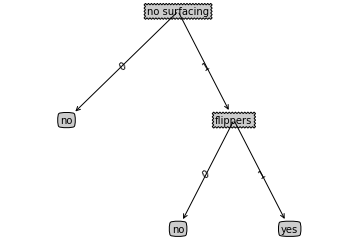

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [30]:
myTree = retrieveTree(0)
createPlot(myTree)
myTree

In [31]:
myTree['no surfacing'][3] = 'maybe'

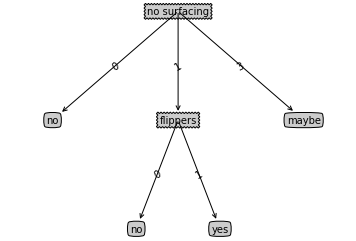

In [32]:
createPlot(myTree)

In [33]:
# 使用决策树的分类函数
def classify(inputTree, featLabels, testVec):
    firstStr = list(inputTree.keys())[0]

    secondDict = inputTree[firstStr]

    featIndex = featLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key], featLabels, testVec)
            else:  classLabel = secondDict[key]
    return classLabel

In [34]:
myDat, labels = createDataSet()

In [35]:
myTree = createTree(myDat, labels)

In [36]:
myDat, labels = createDataSet()

In [37]:
classify(myTree, labels, [1, 1])

'yes'

#### 决策树的存储 

In [38]:
#使用pickle模块存储决策树
def stroeTree(inputTree, filename):
    import pickle
    
    fw = open(filename, 'wb')
    pickle.dump(inputTree, fw)
    fw.close()

def grabTree(filename):
    import pickle
    fr = open(filename, 'rb')
    return pickle.load(fr)

In [39]:
stroeTree(myTree, 'classifierStroage.txt')

In [40]:
grabTree('classifierStroage.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

## 使用决策树预测隐形眼镜类型 

In [41]:
fr = open('/home/jimmyli/mlpractice/机器学习实战/ch3/lenses.txt')

In [42]:
lenses = [inst.strip().split('\t') for inst in fr.readlines()]

In [43]:
lensesLabels=['age', 'prescript', 'astigmatic', 'tearRate']

In [44]:
lensesTree = createTree(lenses, lensesLabels)

In [45]:
lensesTree

{'tearRate': {'normal': {'astigmatic': {'no': {'age': {'young': 'soft',
      'pre': 'soft',
      'presbyopic': {'prescript': {'hyper': 'soft', 'myope': 'no lenses'}}}},
    'yes': {'prescript': {'hyper': {'age': {'young': 'hard',
        'pre': 'no lenses',
        'presbyopic': 'no lenses'}},
      'myope': 'hard'}}}},
  'reduced': 'no lenses'}}

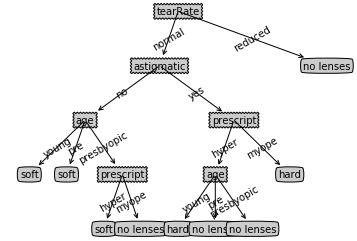

In [46]:
createPlot(lensesTree)